In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import sys
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
pd.set_option('display.max_rows', 100,'display.max_columns', 1000,"display.max_colwidth",1000,'display.width',1000)

from sklearn.metrics import *
from sklearn.linear_model import *
from sklearn.neighbors import *
from sklearn.svm import *
from sklearn.neural_network import *
from sklearn.tree import *
from sklearn.ensemble import *
from xgboost import *
import lightgbm as lgb
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import *
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import *

# 读取数据

In [2]:
data = pd.read_excel("final_data.xlsx", na_values=np.nan)

In [3]:
data.shape

(93738, 190)

In [4]:
data.head()

,售价,新车售价,行驶里程,排量(L),最高车速(km/h),官方0-100km/h加速(s),工信部综合油耗(L/100km),长度(mm),宽度(mm),高度(mm),轴距(mm),前轮距(mm),后轮距(mm),车门数,座位数,油箱容积(L),行李厢容积(L),整备质量(kg),最小离地间隙(mm),排量(mL),气缸数(个),每缸气门数(个),压缩比,最大马力(Ps),最大功率(kW),最大功率转速(rpm),最大扭矩(N·m),最大扭矩转速(rpm),前排侧气囊,无钥匙启动系统,TRC牵引力控制系统,上坡辅助,电动天窗,真皮方向盘,日间行车灯,自动头灯,后视镜加热,后雨刷,后座出风口,过户记录,4S店保养,原始购车/过户发票,车辆购置税完税证明,载客/人,商业险过期日期差（天）,交强险过期日期差（天）,注册日期差（天）,出厂日期差（天）,车船税过期日期差（天）,进气形式_双涡轮增压,进气形式_无,进气形式_机械+涡轮增压,进气形式_机械增压,进气形式_涡轮增压,进气形式_自然吸气,气缸排列形式_H,气缸排列形式_L,气缸排列形式_V,气缸排列形式_W,气缸排列形式_无,配气机构_DOHC,配气机构_OHV,配气机构_SOHC,配气机构_无,配气机构_未知,燃油标号_0号,燃油标号_89号,燃油标号_92号,燃油标号_93号(京92号),燃油标号_93号（京92号）,燃油标号_95号,燃油标号_97号(京95号),燃油标号_98号,燃油标号_无,供油方式_单点电喷,供油方式_多点电喷,供油方式_无,供油方式_混合喷射,供油方式_直喷,缸盖材料_无,缸盖材料_未知,缸盖材料_铁,缸盖材料_铝,缸盖材料_铝合金,缸盖材料_铝镁合金,缸盖材料_铸铁,缸体材料_无,缸体材料_未知,缸体材料_铁,缸体材料_铝,缸体材料_铝合金,缸体材料_铝镁合金,缸体材料_铸铁,燃油形式_CNG/原厂天然气,燃油形式_增程式,燃油形式_插电式混合动力,燃油形式_无,燃油形式_柴油,燃油形式_汽油,燃油形式_汽油+48V轻混系统,燃油形式_油电混合,燃油形式_纯电动,变速箱类型_CVT,变速箱类型_E-CVT+自动变速箱,变速箱类型_双离合变速箱(DCT),变速箱类型_固定齿比变速箱,变速箱类型_序列变速箱(AMT),变速箱类型_手动变速箱(MT),变速箱类型_手自一体变速箱(AT),变速箱类型_无,变速箱类型_无级变速箱(CVT),变速箱类型_机械式自动变速箱(AMT),变速箱类型_电子无级变速箱(E-CVT),变速箱类型_自动变速箱(AT),驱动方式_中置前驱,驱动方式_中置后驱,驱动方式_中置四驱,驱动方式_前置前驱,驱动方式_前置后驱,驱动方式_前置四驱,驱动方式_双电机后驱,驱动方式_双电机四驱,驱动方式_后置后驱,驱动方式_后置四驱,驱动方式_无,助力类型_无,助力类型_机械液压助力,助力类型_液压助力,助力类型_电动助力,助力类型_电子液压助力,助力类型_电子电传助力,车体结构_承载式,车体结构_无,车体结构_非承载式,前制动_无,前制动_盘式,前制动_通风盘式,前制动_陶瓷通风盘式,前制动_鼓式,后制动_无,后制动_盘式,后制动_通风盘式,后制动_陶瓷通风盘式,后制动_鼓式,驻车制动类型_手刹,驻车制动类型_无,驻车制动类型_电子驻车,驻车制动类型_脚刹,备胎规格_全尺寸,备胎规格_无,备胎规格_非全尺寸,定速巡航_true,定速巡航_加配/选配,定速巡航_无,定速巡航_标配,真皮座椅_true,真皮座椅_加配/选配,真皮座椅_无,真皮座椅_标配,真皮座椅_皮座,变速器类型_手动,变速器类型_无,变速器类型_自动,燃料类型_CNG/原厂天然气,燃料类型_无,燃料类型_柴油,燃料类型_汽油,燃料类型_油电,燃料类型_电动,车身颜色_无,车身颜色_棕色,车身颜色_灰色,车身颜色_白色,车身颜色_粉色,车身颜色_紫色,车身颜色_红色,车身颜色_绿色,车身颜色_蓝色,车身颜色_黄色,车身颜色_黑色,挡位个数_1,挡位个数_10,挡位个数_2,挡位个数_4,挡位个数_5,挡位个数_6,挡位个数_7,挡位个数_8,挡位个数_9,挡位个数_无级变速
0,7.80,18.21,7.58,2.0,196.0,10.763204,7.7,4845.0,1830.0,1460.0,2795.0,1595.000000,1595.000000,4,5,70.0,461.685675,1480.000000,122.000000,1999.0,4,4,10.291931,162.0,119.0,6500.0,194.0,4800.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,28.08553,-23.728384,2150.655333,2257.658212,-20.782174,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1.60,6.03,9.65,1.2,165.0,12.900000,5.7,4249.0,1690.0,1503.0,2465.0,1462.000000,1457.000000,4,5,42.0,370.000000,1020.000000,119.000000,1206.0,4,4,10.500000,87.0,64.0,6000.0,115.0,4400.0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,5,-7.00000,-7.000000,2908.000000,2946.000000,-7.000000,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,19.18,27.74,3.48,1.6,230.0,9.000000,6.0,4635.0,1777.0,1440.0,2700.0,1527.037775,1527.762336,4,5,56.0,470.000000,1413.328755,143.194067,1595.0,4,4,10.291931,156.0,115.0,5500.0,250.0,1250.0,1,1,1,1,1,1,0,1,1,0,0,1,0,0,0,5,54.00000,-38.000000,1418.000000,1607.000000,-38.000000,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,10.20,15.39,14.86,1.8,180.0,10.763204,4.2,4630.0,1775.0,1485.0,2700.0,1525.000000,1520.000000,4,5,45.0,461.685675,1405.000000,143.194067,1798.0,4,4,13.100000,99.0,73.0,5200.0,142.0,4000.0,1,1,1,1,1,0,0,0,1,0,0,0,0,0,0,5,206.00000,206.000000,915.000000,967.000000,206.000000,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,6.00,13.07,7.68,1.6,

In [100]:
data.describe()

,售价,新车售价,行驶里程,排量(L),最高车速(km/h),官方0-100km/h加速(s),工信部综合油耗(L/100km),长度(mm),宽度(mm),高度(mm),轴距(mm),前轮距(mm),后轮距(mm),车门数,座位数,油箱容积(L),行李厢容积(L),整备质量(kg),最小离地间隙(mm),排量(mL),气缸数(个),每缸气门数(个),压缩比,最大马力(Ps),最大功率(kW),最大功率转速(rpm),最大扭矩(N·m),最大扭矩转速(rpm),前排侧气囊,无钥匙启动系统,TRC牵引力控制系统,上坡辅助,电动天窗,真皮方向盘,日间行车灯,自动头灯,后视镜加热,后雨刷,后座出风口,过户记录,4S店保养,原始购车/过户发票,车辆购置税完税证明,载客/人,商业险过期日期差（天）,交强险过期日期差（天）,注册日期差（天）,出厂日期差（天）,车船税过期日期差（天）,进气形式_双涡轮增压,进气形式_无,进气形式_机械+涡轮增压,进气形式_机械增压,进气形式_涡轮增压,进气形式_自然吸气,气缸排列形式_H,气缸排列形式_L,气缸排列形式_V,气缸排列形式_W,气缸排列形式_无,配气机构_DOHC,配气机构_OHV,配气机构_SOHC,配气机构_无,配气机构_未知,燃油标号_0号,燃油标号_89号,燃油标号_92号,燃油标号_93号(京92号),燃油标号_93号（京92号）,燃油标号_95号,燃油标号_97号(京95号),燃油标号_98号,燃油标号_无,供油方式_单点电喷,供油方式_多点电喷,供油方式_无,供油方式_混合喷射,供油方式_直喷,缸盖材料_无,缸盖材料_未知,缸盖材料_铁,缸盖材料_铝,缸盖材料_铝合金,缸盖材料_铝镁合金,缸盖材料_铸铁,缸体材料_无,缸体材料_未知,缸体材料_铁,缸体材料_铝,缸体材料_铝合金,缸体材料_铝镁合金,缸体材料_铸铁,燃油形式_CNG/原厂天然气,燃油形式_增程式,燃油形式_插电式混合动力,燃油形式_无,燃油形式_柴油,燃油形式_汽油,燃油形式_汽油+48V轻混系统,燃油形式_油电混合,燃油形式_纯电动,变速箱类型_CVT,变速箱类型_E-CVT+自动变速箱,变速箱类型_双离合变速箱(DCT),变速箱类型_固定齿比变速箱,变速箱类型_序列变速箱(AMT),变速箱类型_手动变速箱(MT),变速箱类型_手自一体变速箱(AT),变速箱类型_无,变速箱类型_无级变速箱(CVT),变速箱类型_机械式自动变速箱(AMT),变速箱类型_电子无级变速箱(E-CVT),变速箱类型_自动变速箱(AT),驱动方式_中置前驱,驱动方式_中置后驱,驱动方式_中置四驱,驱动方式_前置前驱,驱动方式_前置后驱,驱动方式_前置四驱,驱动方式_双电机后驱,驱动方式_双电机四驱,驱动方式_后置后驱,驱动方式_后置四驱,驱动方式_无,助力类型_无,助力类型_机械液压助力,助力类型_液压助力,助力类型_电动助力,助力类型_电子液压助力,助力类型_电子电传助力,车体结构_承载式,车体结构_无,车体结构_非承载式,前制动_无,前制动_盘式,前制动_通风盘式,前制动_陶瓷通风盘式,前制动_鼓式,后制动_无,后制动_盘式,后制动_通风盘式,后制动_陶瓷通风盘式,后制动_鼓式,驻车制动类型_手刹,驻车制动类型_无,驻车制动类型_电子驻车,驻车制动类型_脚刹,备胎规格_全尺寸,备胎规格_无,备胎规格_非全尺寸,定速巡航_true,定速巡航_加配/选配,定速巡航_无,定速巡航_标配,真皮座椅_true,真皮座椅_加配/选配,真皮座椅_无,真皮座椅_标配,真皮座椅_皮座,变速器类型_手动,变速器类型_无,变速器类型_自动,燃料类型_CNG/原厂天然气,燃料类型_无,燃料类型_柴油,燃料类型_汽油,燃料类型_油电,燃料类型_电动,车身颜色_无,车身颜色_棕色,车身颜色_灰色,车身颜色_白色,车身颜色_粉色,车身颜色_紫色,车身颜色_红色,车身颜色_绿色,车身颜色_蓝色,车身颜色_黄色,车身颜色_黑色,挡位个数_1,挡位个数_10,挡位个数_2,挡位个数_4,挡位个数_5,挡位个数_6,挡位个数_7,挡位个数_8,挡位个数_9,挡位个数_无级变速
count,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.00000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.00000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.00000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.00000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,93738.000000,9

# 去除0-1数据以及One-Hot数据后的列

In [109]:
corr_cols = list(data.columns[:28]) + list(data.columns[43:49])

In [110]:
test_data = data[corr_cols]

In [111]:
test_data_corr = test_data.corr()

In [113]:
price_corr = dict(test_data_corr.iloc[0])

In [114]:
price_corr = sorted(price_corr.items(), key=lambda x: abs(x[1]), reverse=True)

In [115]:
price_corr

[('售价', 1.0),
 ('新车售价', 0.7839935301900343),
 ('最大功率(kW)', 0.7117612690884588),
 ('最大马力(Ps)', 0.7110554212212731),
 ('最大扭矩(N·m)', 0.696952631401139),
 ('最高车速(km/h)', 0.5419965777866631),
 ('排量(mL)', 0.5330405118740592),
 ('排量(L)', 0.5308107362792799),
 ('整备质量(kg)', 0.49194473580917225),
 ('官方0-100km/h加速(s)', -0.48176542342318535),
 ('宽度(mm)', 0.4714397275896106),
 ('轴距(mm)', 0.46166756230018036),
 ('气缸数(个)', 0.4454272911508132),
 ('油箱容积(L)', 0.437777686409757),
 ('后轮距(mm)', 0.38050056092464896),
 ('长度(mm)', 0.3713764530321577),
 ('前轮距(mm)', 0.3620381932871346),
 ('最大扭矩转速(rpm)', -0.3350318499883131),
 ('注册日期差（天）', -0.2737947095245184),
 ('出厂日期差（天）', -0.2598892184068559),
 ('工信部综合油耗(L/100km)', 0.21117598576704852),
 ('行驶里程', -0.15837809707633024),
 ('最大功率转速(rpm)', -0.14929627599693607),
 ('行李厢容积(L)', 0.1303796302281349),
 ('每缸气门数(个)', 0.08610716158708019),
 ('压缩比', 0.0820485577972737),
 ('车门数', -0.05405277879497536),
 ('高度(mm)', 0.04866102899154555),
 ('商业险过期日期差（天）', -0.04736678639121323

In [116]:
price_corr_cols = [ r[0] for r in price_corr ]

In [117]:
price_data = test_data_corr[price_corr_cols].loc[price_corr_cols]

In [282]:
price_data.shape

(34, 34)

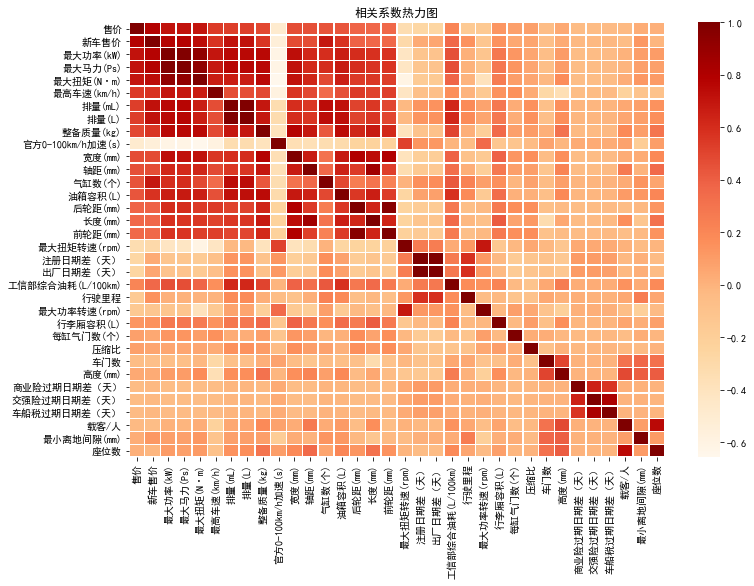

In [291]:
plt.figure(figsize=(12, 8))
plt.title("相关系数热力图")
ax = sns.heatmap(price_data, linewidths=0.5, cmap='OrRd', cbar=True)
plt.show()

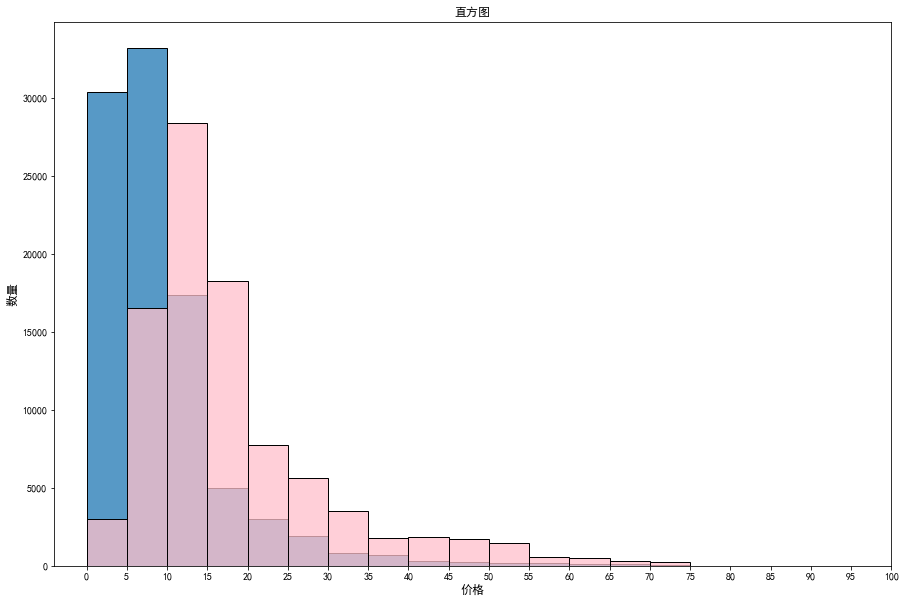

In [157]:
plt.figure(figsize=(15, 10))
plt.title("直方图")
sns.histplot(test_data['售价'], bins = np.arange(0,80,5))
sns.histplot(test_data['新车售价'], bins = np.arange(0,80,5), color="pink")
plt.xlim(-4,100)
x_major_locator=MultipleLocator(5)
plt.gca().xaxis.set_major_locator(x_major_locator)
plt.xlabel("价格", fontdict={"size":12})
plt.ylabel("数量", fontdict={"size":12})
plt.show()

# 切分数据

In [5]:
X = data[ data.columns[1:] ]
y_reg = data[ data.columns[0] ]

In [212]:
x_train, x_test, y_train, y_test = train_test_split(X, y_reg, test_size=0.3, random_state=42)

In [213]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((65616, 189), (28122, 189), (65616,), (28122,))

# 评价指标函数定义

In [214]:
def evaluation(model):
    ypred = model.predict(x_test)
    mae = mean_absolute_error(y_test, ypred)
    mse = mean_squared_error(y_test, ypred)
    rmse = sqrt(mse)
    print("MAE: %.2f" % mae)
    print("MSE: %.2f" % mse)
    print("RMSE: %.2f" % rmse)
    return ypred

# 线性回归模型

In [220]:
model_LR = LinearRegression()
model_LR.fit(x_train, y_train)
print("params: ", model_LR.get_params())
print("train score: ", model_LR.score(x_train, y_train))
print("test score: ", model_LR.score(x_test, y_test))
predict_y = evaluation(model_LR)

params:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
train score:  0.823587700962806
test score:  0.7654427047191524
MAE: 1.97
MSE: 25.90
RMSE: 5.09


In [221]:
test_y = np.array(y_test)

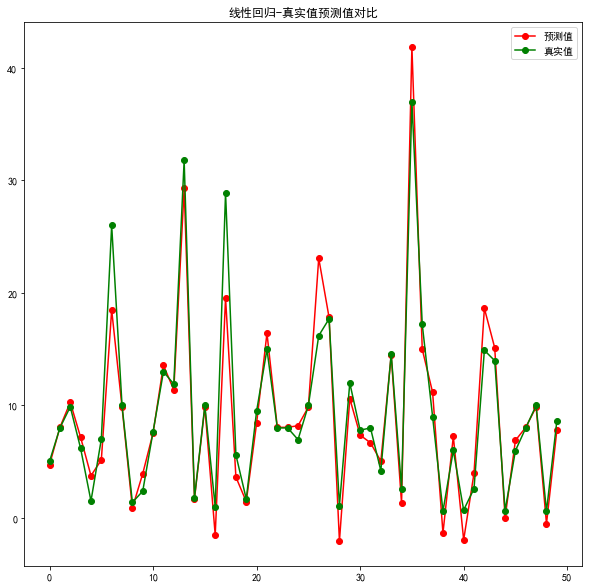

In [222]:
plt.figure(figsize=(10,10))
# 预测值
plt.title('线性回归-真实值预测值对比')
plt.plot(predict_y[:50], 'ro-', label='预测值')
plt.plot(test_y[:50], 'go-', label='真实值')
plt.legend()
plt.show()

# KNN

In [223]:
model_knn = KNeighborsRegressor()
model_knn.fit(x_train, y_train)
print("params: ", model_knn.get_params())
print("train score: ", model_knn.score(x_train, y_train))
print("test score: ", model_knn.score(x_test, y_test))
predict_y = evaluation(model_knn)

params:  {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
train score:  0.8701966571367806
test score:  0.7886892618747352
MAE: 1.35
MSE: 23.33
RMSE: 4.83


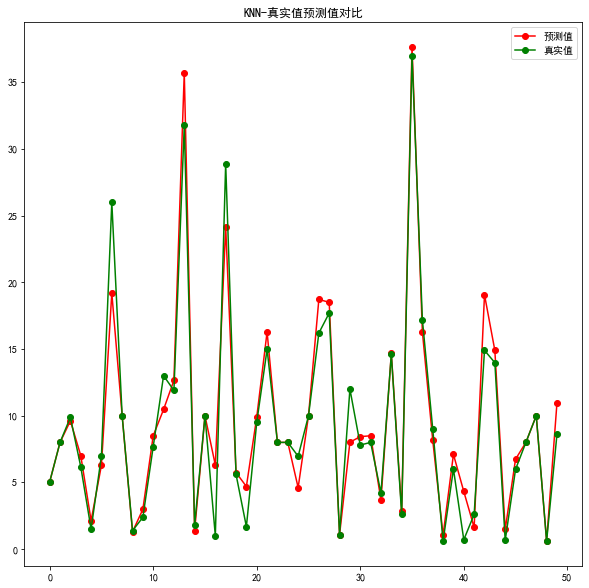

In [224]:
plt.figure(figsize=(10,10))
# 预测值
plt.title('KNN-真实值预测值对比')
plt.plot(predict_y[:50], 'ro-', label='预测值')
plt.plot(test_y[:50], 'go-', label='真实值')
plt.legend()
plt.show()

# SVM（训练时间太长了）

In [ ]:
model_svr = SVR()
model_svr.fit(x_train, y_train)
print("params: ", model_svr.get_params())
print("score: ", model_svr.score(x_test, y_test))
evaluation(model_svr)

# 岭回归

In [225]:
model_ridge = Ridge()
model_ridge.fit(x_train, y_train)
print("params: ", model_ridge.get_params())
print("train score: ", model_ridge.score(x_train, y_train))
print("test score: ", model_ridge.score(x_test, y_test))
predict_y = evaluation(model_ridge)

params:  {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}
train score:  0.8235060491702535
test score:  0.7649374694021109
MAE: 1.97
MSE: 25.95
RMSE: 5.09


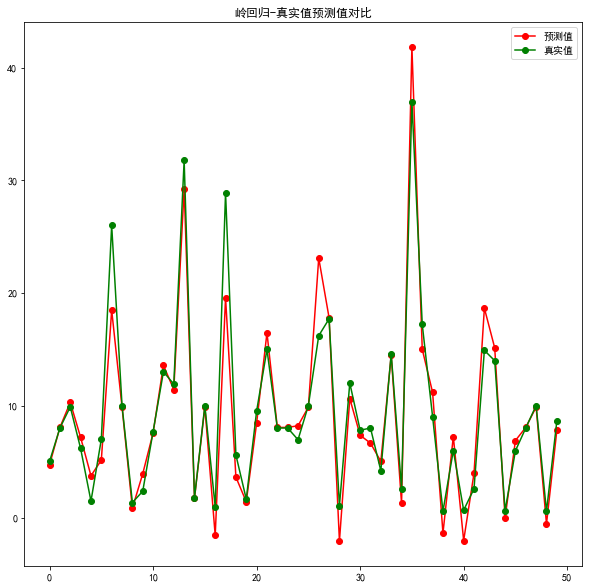

In [226]:
plt.figure(figsize=(10,10))
# 预测值
plt.title('岭回归-真实值预测值对比')
plt.plot(predict_y[:50], 'ro-', label='预测值')
plt.plot(test_y[:50], 'go-', label='真实值')
plt.legend()
plt.show()

# LASSO回归 （训练时间长）

In [ ]:
model_lasso = Lasso()
model_lasso.fit(x_train, y_train)
print("params: ", model_lasso.get_params())
print("score: ", model_lasso.score(x_test, y_test))
evaluation(model_lasso)

# 多层感知机

In [228]:
model_mlp = MLPRegressor(random_state=42)
model_mlp.fit(x_train, y_train)
print("params: ", model_mlp.get_params())
print("train score: ", model_mlp.score(x_train, y_train))
print("test score: ", model_mlp.score(x_test, y_test))
predict_y = evaluation(model_mlp)

params:  {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
train score:  0.310195694691079
test score:  0.2516489434205694
MAE: 7.66
MSE: 82.63
RMSE: 9.09


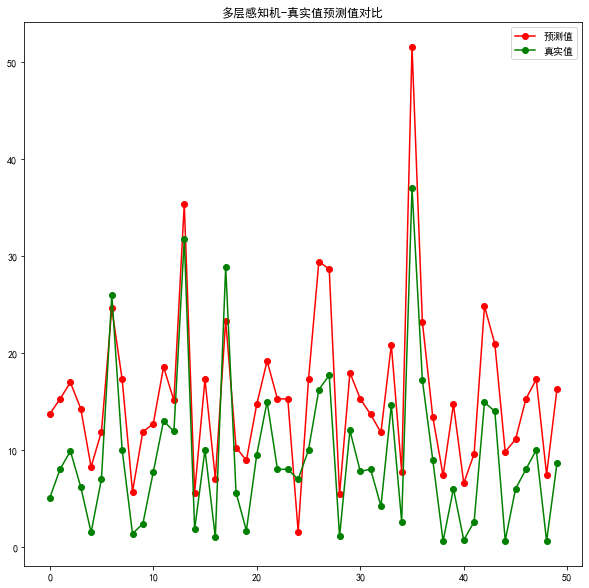

In [229]:
plt.figure(figsize=(10,10))
# 预测值
plt.title('多层感知机-真实值预测值对比')
plt.plot(predict_y[:50], 'ro-', label='预测值')
plt.plot(test_y[:50], 'go-', label='真实值')
plt.legend()
plt.show()

# 决策树回归

In [233]:
model_dtr = DecisionTreeRegressor(max_depth = 5, random_state=30)
model_dtr.fit(x_train, y_train)
print("params: ", model_dtr.get_params())
print("train score: ", model_dtr.score(x_train, y_train))
print("test score: ", model_dtr.score(x_test, y_test))
predict_y = evaluation(model_dtr)

params:  {'criterion': 'mse', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 30, 'splitter': 'best'}
train score:  0.8421774667649017
test score:  0.7833910010986486
MAE: 2.09
MSE: 23.92
RMSE: 4.89


In [234]:
model_dtr.get_depth()

5

In [230]:
model_dtr = DecisionTreeRegressor( random_state=30)
model_dtr.fit(x_train, y_train)
print("params: ", model_dtr.get_params())
print("train score: ", model_dtr.score(x_train, y_train))
print("test score: ", model_dtr.score(x_test, y_test))
predict_y = evaluation(model_dtr)

params:  {'criterion': 'mse', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 30, 'splitter': 'best'}
train score:  0.999999225529954
test score:  0.8673942873037808
MAE: 1.16
MSE: 14.64
RMSE: 3.83


In [231]:
model_dtr.get_depth()

38

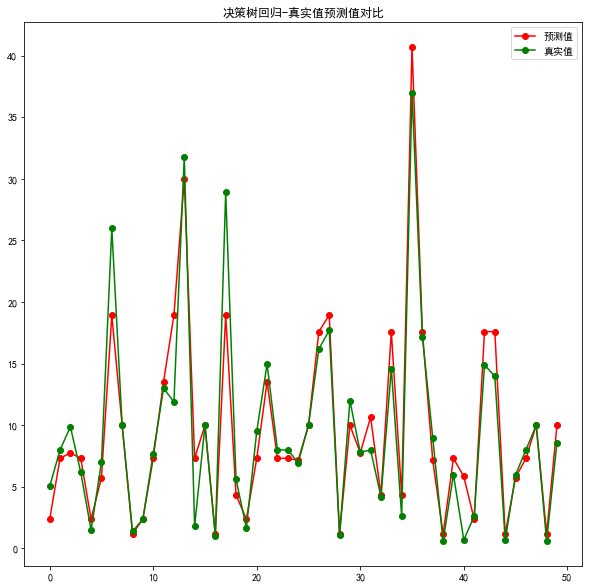

In [235]:
plt.figure(figsize=(10,10))
# 预测值
plt.title('决策树回归-真实值预测值对比')
plt.plot(predict_y[:50], 'ro-', label='预测值')
plt.plot(test_y[:50], 'go-', label='真实值')
plt.legend()
plt.show()

# 极限树回归

In [195]:
model_etr = ExtraTreeRegressor(random_state=30)
model_etr.fit(x_train, y_train)
print("params: ", model_etr.get_params())
print("train score: ", model_etr.score(x_train, y_train))
print("test score: ", model_etr.score(x_test, y_test))
predict_y = evaluation(model_etr)

params:  {'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 30, 'splitter': 'random'}
train score:  0.999998700385033
test score:  0.7181314514624382
MAE: 1.12
MSE: 24.18
RMSE: 4.92


In [196]:
model_etr.get_depth() # 树太深了，过拟合

43

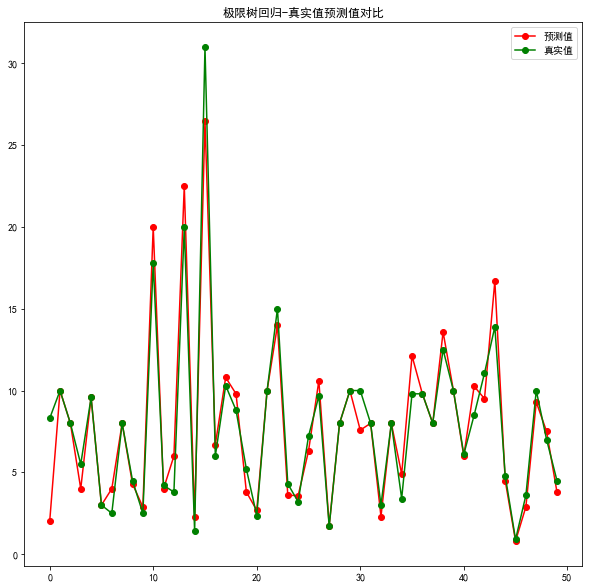

In [197]:
plt.figure(figsize=(10,10))
# 预测值
plt.title('极限树回归-真实值预测值对比')
plt.plot(predict_y[:50], 'ro-', label='预测值')
plt.plot(test_y[:50], 'go-', label='真实值')
plt.legend()
plt.show()

# 随机森林

In [236]:
model_rfr = RandomForestRegressor(random_state=30)
model_rfr.fit(x_train, y_train)
print("params: ", model_rfr.get_params())
print("train score: ", model_rfr.score(x_train, y_train))
print("test score: ", model_rfr.score(x_test, y_test))
predict_y = evaluation(model_rfr)

params:  {'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 30, 'verbose': 0, 'warm_start': False}
train score:  0.9873589573962257
test score:  0.9004628017201377
MAE: 0.88
MSE: 10.99
RMSE: 3.32


In [292]:
feature_important = sorted(
    zip(x_train.columns, map(lambda x:round(x,4), model_rfr.feature_importances_)),
    key=lambda x: x[1],reverse=True)

for i in range(33):
    print(feature_important[i])

('新车售价', 0.5435)
('最大马力(Ps)', 0.0928)
('注册日期差（天）', 0.077)
('最大扭矩(N·m)', 0.0547)
('最大功率(kW)', 0.05)
('行驶里程', 0.0406)
('出厂日期差（天）', 0.0187)
('高度(mm)', 0.0128)
('驻车制动类型_手刹', 0.0107)
('最大功率转速(rpm)', 0.0098)
('宽度(mm)', 0.007)
('轴距(mm)', 0.0059)
('工信部综合油耗(L/100km)', 0.0052)
('最大扭矩转速(rpm)', 0.0043)
('长度(mm)', 0.0042)
('助力类型_电动助力', 0.0041)
('后轮距(mm)', 0.0038)
('整备质量(kg)', 0.0038)
('挡位个数_5', 0.0035)
('行李厢容积(L)', 0.0027)
('最高车速(km/h)', 0.0026)
('官方0-100km/h加速(s)', 0.0026)
('油箱容积(L)', 0.0026)
('前轮距(mm)', 0.0024)
('压缩比', 0.0023)
('排量(mL)', 0.0021)
('排量(L)', 0.0019)
('上坡辅助', 0.0015)
('日间行车灯', 0.0013)
('商业险过期日期差（天）', 0.0013)
('最小离地间隙(mm)', 0.0012)
('挡位个数_6', 0.0012)
('交强险过期日期差（天）', 0.0011)


In [293]:
f1_list = []
f2_list = []

for i in range(33):
    f1_list.append(feature_important[i][0])

for i in range(1, 34):
    f2_list.append(price_corr[i][0])
    
cnt = 0
for i in range(33):
    if f1_list[i] in f2_list:
        print(f1_list[i])
        cnt += 1
print("共有"+str(cnt)+"个重复特征！")

新车售价
最大马力(Ps)
注册日期差（天）
最大扭矩(N·m)
最大功率(kW)
行驶里程
出厂日期差（天）
高度(mm)
最大功率转速(rpm)
宽度(mm)
轴距(mm)
工信部综合油耗(L/100km)
最大扭矩转速(rpm)
长度(mm)
后轮距(mm)
整备质量(kg)
行李厢容积(L)
最高车速(km/h)
官方0-100km/h加速(s)
油箱容积(L)
前轮距(mm)
压缩比
排量(mL)
排量(L)
商业险过期日期差（天）
最小离地间隙(mm)
交强险过期日期差（天）
共有27个重复特征！


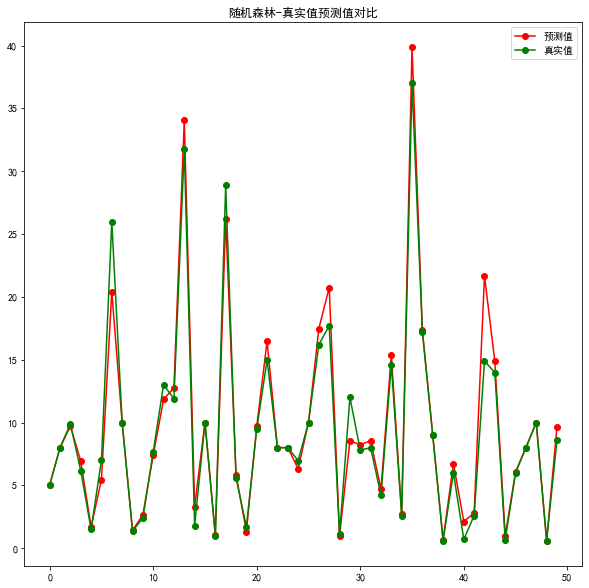

In [237]:
plt.figure(figsize=(10,10))
# 预测值
plt.title('随机森林-真实值预测值对比')
plt.plot(predict_y[:50], 'ro-', label='预测值')
plt.plot(test_y[:50], 'go-', label='真实值')
plt.legend()
plt.show()

# Adaboost

In [200]:
model_abr = AdaBoostRegressor()
model_abr.fit(x_train, y_train)
print("params: ", model_abr.get_params())
print("train score: ", model_abr.score(x_train, y_train))
print("test score: ", model_abr.score(x_test, y_test))
predict_y = evaluation(model_abr)

params:  {'base_estimator': None, 'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 50, 'random_state': None}
train score:  0.08538411969774362
test score:  -0.1946325713288004
MAE: 9.24
MSE: 102.46
RMSE: 10.12


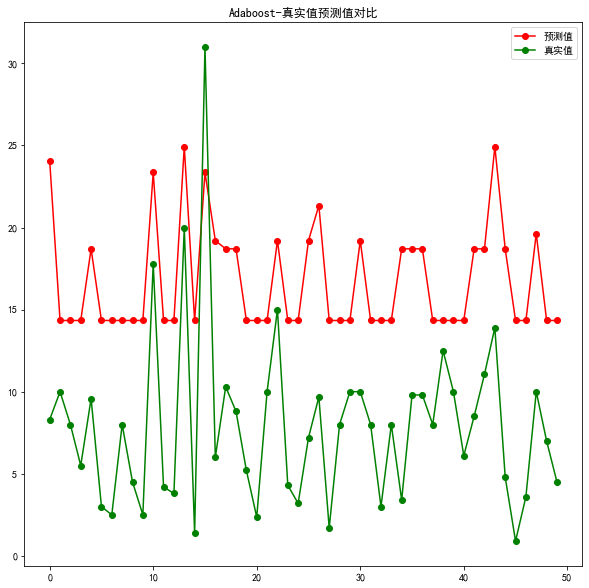

In [201]:
plt.figure(figsize=(10,10))
# 预测值
plt.title('Adaboost-真实值预测值对比')
plt.plot(predict_y[:50], 'ro-', label='预测值')
plt.plot(test_y[:50], 'go-', label='真实值')
plt.legend()
plt.show()

# 梯度提升树

In [202]:
model_gbr = GradientBoostingRegressor()
model_gbr.fit(x_train, y_train)
print("params: ", model_gbr.get_params())
print("train score: ", model_gbr.score(x_train, y_train))
print("test score: ", model_gbr.score(x_test, y_test))
predict_y = evaluation(model_gbr)

params:  {'alpha': 0.9, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
train score:  0.9522104113372714
test score:  0.9244081842311953
MAE: 1.32
MSE: 6.48
RMSE: 2.55


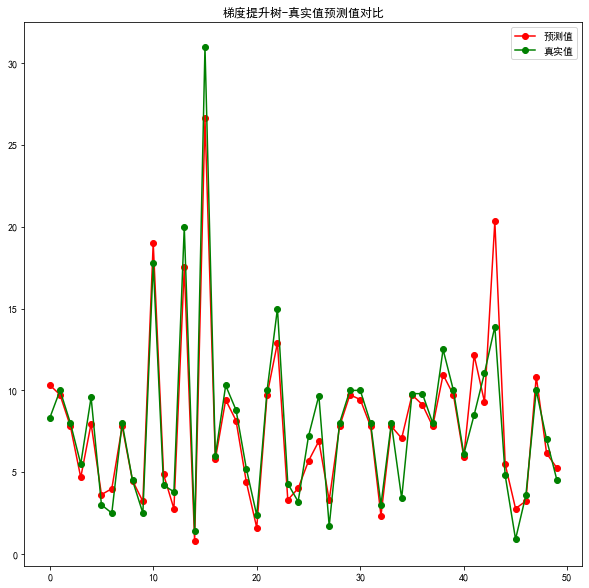

In [203]:
plt.figure(figsize=(10,10))
# 预测值
plt.title('梯度提升树-真实值预测值对比')
plt.plot(predict_y[:50], 'ro-', label='预测值')
plt.plot(test_y[:50], 'go-', label='真实值')
plt.legend()
plt.show()

# Bagging

In [46]:
model_br = BaggingRegressor(random_state=30)
model_br.fit(x_train, y_train)
print("params: ", model_br.get_params())
print("train score: ", model_br.score(x_train, y_train))
print("test score: ", model_br.score(x_test, y_test))
predict_y = evaluation(model_br)

params:  {'base_estimator': None, 'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 30, 'verbose': 0, 'warm_start': False}
train score:  0.985160729936757
test score:  0.9560779050013116
MAE: 0.83
MSE: 3.77
RMSE: 1.94


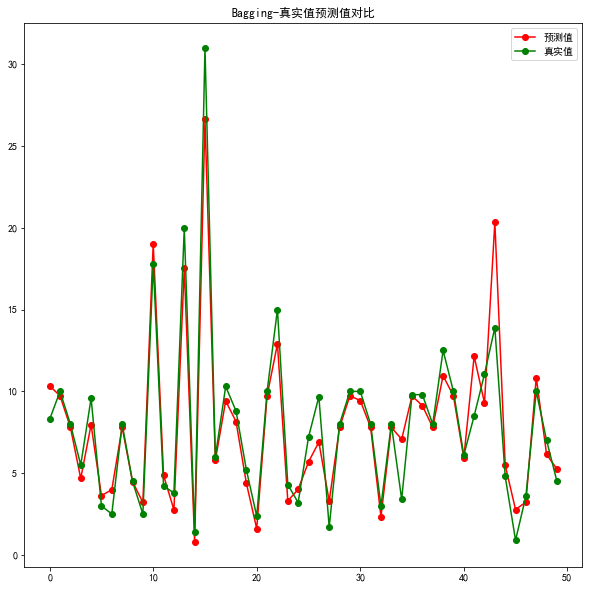

In [204]:
plt.figure(figsize=(10,10))
# 预测值
plt.title('Bagging-真实值预测值对比')
plt.plot(predict_y[:50], 'ro-', label='预测值')
plt.plot(test_y[:50], 'go-', label='真实值')
plt.legend()
plt.show()

# XGBR

In [251]:
model_xgbr = XGBRegressor(n_estimators = 200, max_depth=5, random_state=1024)
model_xgbr.fit(x_train, y_train)
print("params: ", model_xgbr.get_params())
print("train score: ", model_xgbr.score(x_train, y_train))
print("test score: ", model_xgbr.score(x_test, y_test))
predict_y = evaluation(model_xgbr)

params:  {'objective': 'reg:squarederror', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'gpu_id': -1, 'importance_type': 'gain', 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 200, 'n_jobs': 0, 'num_parallel_tree': 1, 'random_state': 1024, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}
train score:  0.9897272945187993
test score:  0.8923618501911923
MAE: 0.88
MSE: 11.88
RMSE: 3.45


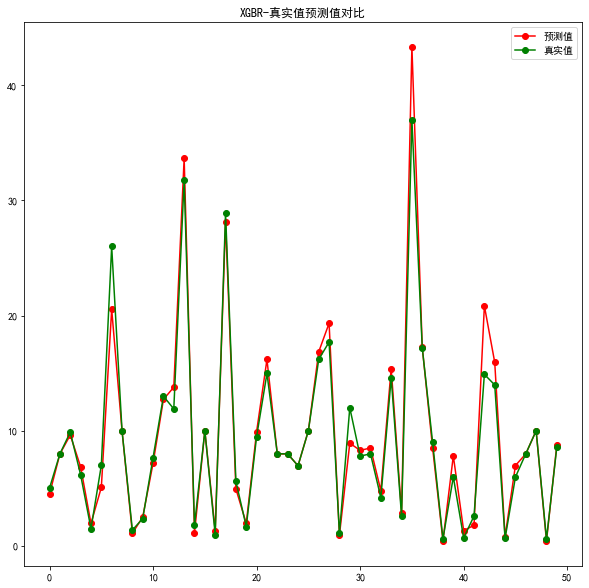

In [252]:
plt.figure(figsize=(10,10))
# 预测值
plt.title('XGBR-真实值预测值对比')
plt.plot(predict_y[:50], 'ro-', label='预测值')
plt.plot(test_y[:50], 'go-', label='真实值')
plt.legend()
plt.show()

# LGBM

In [266]:
model_lgb = lgb.LGBMRegressor(num_leaves=40, max_depth=5, random_state=42)
model_lgb.fit(x_train, y_train)
print("params: ", model_lgb.get_params())
print("train score: ", model_lgb.score(x_train, y_train))
print("test score: ", model_lgb.score(x_test, y_test))
predict_y = evaluation(model_lgb)

params:  {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': 5, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 40, 'objective': None, 'random_state': 42, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}
train score:  0.9223970412730735
test score:  0.8813891186967769
MAE: 1.22
MSE: 13.10
RMSE: 3.62


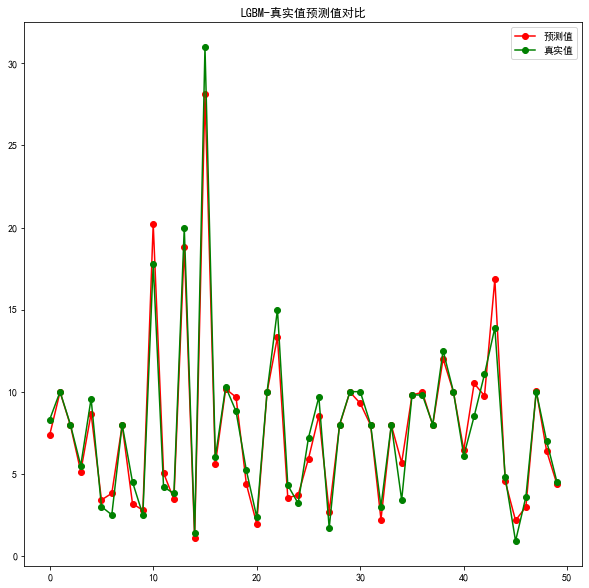

In [208]:
plt.figure(figsize=(10,10))
# 预测值
plt.title('LGBM-真实值预测值对比')
plt.plot(predict_y[:50], 'ro-', label='预测值')
plt.plot(test_y[:50], 'go-', label='真实值')
plt.legend()
plt.show()

# 集成模型voting

In [267]:
model_voting = VotingRegressor(estimators=[('model_LR', model_LR), 
                                           ('model_knn', model_knn), 
                                                ('model_dtr', model_dtr),
                                                ('model_rfr', model_rfr),
                                                ('model_xgbr', model_xgbr)
                                            ])
model_voting.fit(x_train, y_train)
# print("params: ", model_voting.get_params())
print("train score: ", model_voting.score(x_train, y_train))
print("test score: ", model_voting.score(x_test, y_test))
predict_y = evaluation(model_voting)

train score:  0.9572901767964346
test score:  0.8964163648799375
MAE: 1.08
MSE: 11.44
RMSE: 3.38


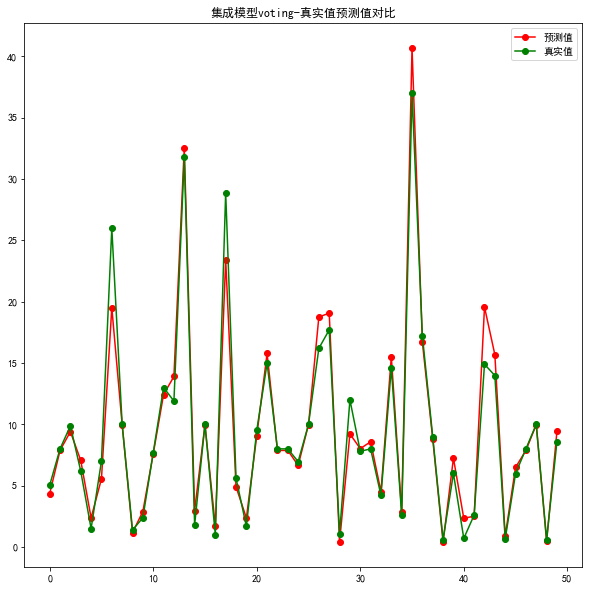

In [268]:
plt.figure(figsize=(10,10))
# 预测值
plt.title('集成模型voting-真实值预测值对比')
plt.plot(predict_y[:50], 'ro-', label='预测值')
plt.plot(test_y[:50], 'go-', label='真实值')
plt.legend()
plt.show()

# Tensorflow 神经网络

In [269]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [270]:
train_x = np.array(x_train_scaled)
#train_x_ = train_x_[:900]
#val_x = train_x_[900:]

test_x = np.array(x_test_scaled)


train_y = np.array(y_train)
# train_y = train_y[:900]
# val_y = train_y[900:]

test_y = np.array(y_test)

In [271]:
# 1
model_tf = tf.keras.Sequential()

# 2
# layer1 = layers.Dense(128, activation='relu')
# layer1.get_weights()
#model.add(layers.Dense(47, activation='relu'))
# model_tf.add(layers.Dense(256, activation='relu'))
model_tf.add(layers.Dense(128, activation='relu'))
model_tf.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(16, activation='relu'))
model_tf.add(layers.Dense(8, activation='relu'))
model_tf.add(layers.Dense(4, activation='relu'))
model_tf.add(layers.Dense(1, activation='relu'))
model_tf.build(input_shape =(None,189))
model_tf.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
             loss=tf.keras.losses.mean_squared_error,
             metrics=['mse', 'mae']) #, tf.keras.metrics.mse, tf.keras.metrics.RootMeanSquaredError])
# 3
# model.build(input_shape =(None,47))
# model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
#              loss=tf.keras.losses.categorical_crossentropy,
#              metrics=[tf.keras.metrics.categorical_accuracy])

# 4
history = model_tf.fit(train_x, train_y, epochs=200, batch_size=128,
                    #validation_data=(train_x_[2800:], train_y[2800:]),shuffle=False)
                    validation_split = 0.2, #从测试集中划分80%给训练集
                    validation_freq = 1) #测试的间隔次数为20, validation_data=(val_x, val_y))

# 5
model_tf.summary()

Train on 52492 samples, validate on 13124 samples
Epoch 1/200
52492/52492 [==============================] - 1s 20us/sample - loss: 31.1612 - mse: 31.1612 - mae: 2.0019 - val_loss: 10.1743 - val_mse: 10.1743 - val_mae: 1.4323
Epoch 2/200
52492/52492 [==============================] - 1s 11us/sample - loss: 17.6297 - mse: 17.6297 - mae: 1.3916 - val_loss: 7.0862 - val_mse: 7.0862 - val_mae: 1.2207
Epoch 3/200
52492/52492 [==============================] - 1s 11us/sample - loss: 13.6352 - mse: 13.6352 - mae: 1.2595 - val_loss: 9.4706 - val_mse: 9.4706 - val_mae: 1.2650
Epoch 4/200
52492/52492 [==============================] - 1s 11us/sample - loss: 11.6730 - mse: 11.6730 - mae: 1.2031 - val_loss: 6.5370 - val_mse: 6.5370 - val_mae: 1.2146
Epoch 5/200
52492/52492 [==============================] - ETA: 0s - loss: 11.2598 - mse: 11.2598 - mae: 1.144 - 1s 11us/sample - loss: 10.7561 - mse: 10.7561 - mae: 1.1403 - val_loss: 6.9616 - val_mse: 6.9616 - val_mae: 1.0837
Epoch 6/200
52492/52492 

Epoch 94/200
52492/52492 [==============================] - 1s 11us/sample - loss: 1.4465 - mse: 1.4465 - mae: 0.6808 - val_loss: 3.6259 - val_mse: 3.6259 - val_mae: 0.9011
Epoch 95/200
52492/52492 [==============================] - 1s 11us/sample - loss: 1.4319 - mse: 1.4319 - mae: 0.6798 - val_loss: 3.4633 - val_mse: 3.4633 - val_mae: 0.9093
Epoch 96/200
52492/52492 [==============================] - 1s 11us/sample - loss: 1.3998 - mse: 1.3998 - mae: 0.6772 - val_loss: 3.0300 - val_mse: 3.0300 - val_mae: 0.8515
Epoch 97/200
52492/52492 [==============================] - 1s 12us/sample - loss: 1.5259 - mse: 1.5259 - mae: 0.6772 - val_loss: 3.0739 - val_mse: 3.0739 - val_mae: 0.8925
Epoch 98/200
52492/52492 [==============================] - 1s 11us/sample - loss: 1.4230 - mse: 1.4230 - mae: 0.6736 - val_loss: 3.6002 - val_mse: 3.6002 - val_mae: 0.9199
Epoch 99/200
52492/52492 [==============================] - 1s 11us/sample - loss: 1.5754 - mse: 1.5754 - mae: 0.6775 - val_loss: 3.081

52492/52492 [==============================] - 1s 11us/sample - loss: 1.1605 - mse: 1.1605 - mae: 0.6232 - val_loss: 3.3664 - val_mse: 3.3664 - val_mae: 0.8972
Epoch 140/200
52492/52492 [==============================] - 1s 11us/sample - loss: 1.1907 - mse: 1.1907 - mae: 0.6248 - val_loss: 3.5647 - val_mse: 3.5647 - val_mae: 0.8961
Epoch 141/200
52492/52492 [==============================] - 1s 11us/sample - loss: 1.1638 - mse: 1.1638 - mae: 0.6227 - val_loss: 3.8068 - val_mse: 3.8068 - val_mae: 0.8861
Epoch 142/200
52492/52492 [==============================] - ETA: 0s - loss: 1.2026 - mse: 1.2026 - mae: 0.623 - 1s 12us/sample - loss: 1.2002 - mse: 1.2002 - mae: 0.6231 - val_loss: 3.0423 - val_mse: 3.0423 - val_mae: 0.8467
Epoch 143/200
52492/52492 [==============================] - 1s 11us/sample - loss: 1.1625 - mse: 1.1625 - mae: 0.6202 - val_loss: 3.1492 - val_mse: 3.1492 - val_mae: 0.8611
Epoch 144/200
52492/52492 [==============================] - 1s 11us/sample - loss: 1.1220 -

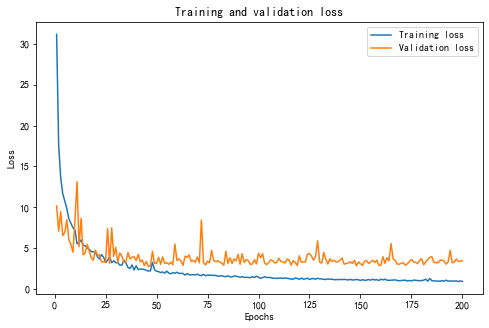

In [274]:
history_dict = history.history
loss_values = history_dict['loss']
mae=history_dict["mae"]
mse=history_dict["mse"]
val_loss = history_dict['val_loss']
val_mae = history_dict['val_mae']
val_mse = history_dict['val_mse']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(loss_values) + 1), loss_values, label = 'Training loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.plot(loss_values)
#plt.plot(val_loss)
#plt.plot(pre)
plt.show()

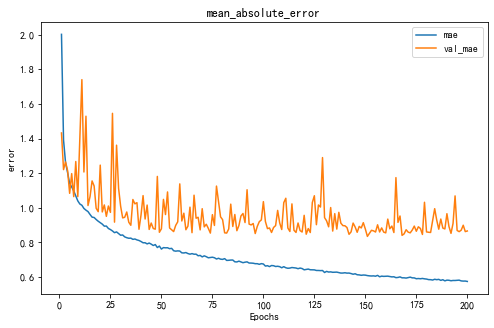

In [275]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(mae) + 1), mae, label = 'mae')
plt.plot(range(1, len(val_mae) + 1), val_mae, label = 'val_mae')
plt.title('mean_absolute_error')
plt.xlabel('Epochs')
plt.ylabel('error')
plt.legend()
#plt.plot(loss_values)
#plt.plot(val_loss)
#plt.plot(pre)
plt.show()

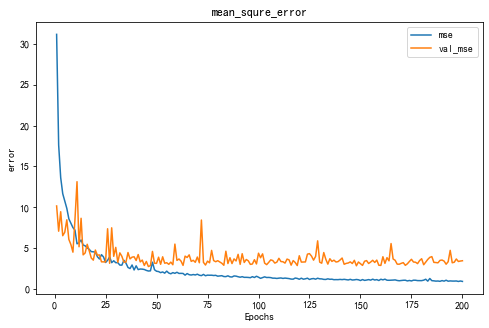

In [277]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(mse) + 1), mse, label = 'mse')
plt.plot(range(1, len(val_mse) + 1), val_mse, label = 'val_mse')
plt.title('mean_squre_error')
plt.xlabel('Epochs')
plt.ylabel('error')
plt.legend()
#plt.plot(loss_values)
#plt.plot(val_loss)
#plt.plot(pre)
plt.show()

In [279]:
ypred = model_tf.predict(test_x)
mae = mean_absolute_error(test_y, ypred)
mse = mean_squared_error(test_y, ypred)
rmse = sqrt(mse)

train_ypred = model_tf.predict(train_x)
train_r2_score = r2_score(train_y, train_ypred)
test_r2_score = r2_score(test_y, ypred)
print("MAE: %.2f" % mae)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)
print("train score: ", train_r2_score)
print("test score: ", test_r2_score)

MAE: 0.94
MSE: 24.03
RMSE: 4.90
train score:  0.985643774232881
test score:  0.7823455700623437


In [94]:
def evaluation_tf(model):
    ypred = model.predict(test_x)
    mae = mean_absolute_error(test_y, ypred)
    mse = mean_squared_error(test_y, ypred)
    rmse = sqrt(mse)
    print("MAE: %.2f" % mae)
    print("MSE: %.2f" % mse)
    print("RMSE: %.2f" % rmse)

In [95]:
evaluation_tf(model_tf)

MAE: 0.89
MSE: 11.03
RMSE: 3.32


In [96]:
model_tf.evaluate(test_x, test_y, verbose=0)

[11.02518231681719, 11.025181, 0.89300525]

In [97]:
model_tf.metrics_names

['loss', 'mse', 'mae']

In [99]:
predict_y = model_tf.predict(test_x)
[*zip(test_y, predict_y)]

[(8.3, array([5.1551137], dtype=float32)),
 (10.0, array([9.944355], dtype=float32)),
 (8.0, array([7.9243073], dtype=float32)),
 (5.5, array([4.097093], dtype=float32)),
 (9.58, array([9.805832], dtype=float32)),
 (3.0, array([2.9862614], dtype=float32)),
 (2.5, array([3.0676398], dtype=float32)),
 (8.0, array([7.9243073], dtype=float32)),
 (4.5, array([4.6323853], dtype=float32)),
 (2.5, array([2.4092607], dtype=float32)),
 (17.8, array([17.829575], dtype=float32)),
 (4.2, array([4.3925743], dtype=float32)),
 (3.8, array([3.522791], dtype=float32)),
 (19.98, array([22.08206], dtype=float32)),
 (1.4, array([1.2408202], dtype=float32)),
 (31.0, array([29.264687], dtype=float32)),
 (6.0, array([5.8028464], dtype=float32)),
 (10.3, array([10.772638], dtype=float32)),
 (8.8, array([9.085275], dtype=float32)),
 (5.2, array([4.620781], dtype=float32)),
 (2.36, array([2.4223309], dtype=float32)),
 (10.0, array([9.944355], dtype=float32)),
 (15.0, array([15.14996], dtype=float32)),
 (4.3, arr